In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [358]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-200:]
#df['y'] = df['y']*100

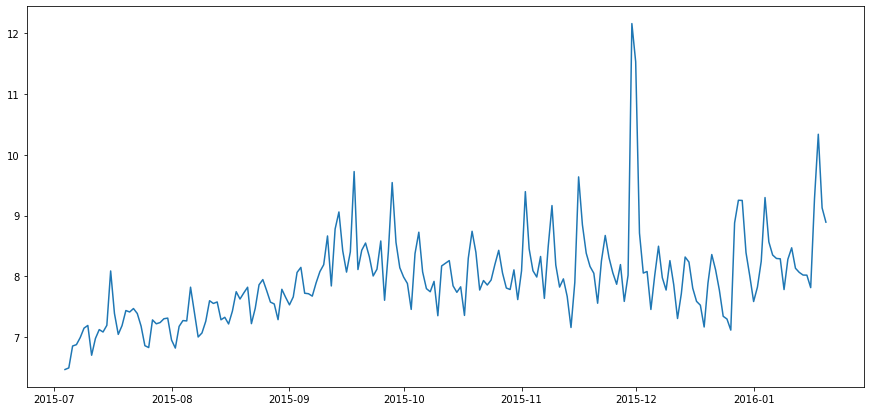

In [359]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [360]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
df_train = df.iloc[:-validation_size]
df_validation = df.iloc[-validation_size:]
print(df_train.shape)
print(df_validation.shape)

(160, 2)
(40, 2)


In [361]:
import importlib
import Chronos


In [378]:
importlib.reload(Chronos)
my_cr = Chronos.Chronos(G=400,
                        p_m= 0.08, 
                        r_m = 0.01)

In [379]:
my_cr = my_cr.fit(df_train)

population initalized


In [380]:
my_cr.best_individual

array([5.33405046e+00, 1.34954171e-03, 4.55412364e-01, 1.55990971e+00])

In [381]:
train_df = df_train.copy()
train_df['ts'] = train_df['ds'].astype(np.int64)/(1e9*60*60)
min_ts = train_df['ts'].min()
train_df['ts'] = train_df['ts'] - min_ts

In [382]:
predictions = my_cr.best_individual[0] + (train_df['ts'] * my_cr.best_individual[1])
predictions += my_cr.best_individual[2]* np.sin((train_df['ts']/365.25) + my_cr.best_individual[3])

In [383]:
predictions.head()

2705    5.789436
2706    5.821168
2707    5.850937
2708    5.878755
2709    5.904641
Name: ts, dtype: float64

In [384]:
from Chronos import CHRONOS_MSE
CHRONOS_MSE(train_df['y'], predictions)

1.0840811353081174

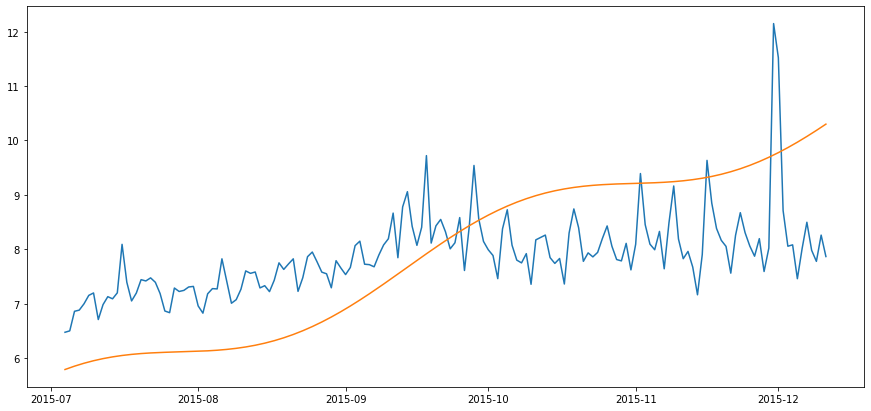

In [385]:
plt.figure(figsize=(15,7))
plt.plot(train_df['ds'], train_df['y'])
plt.plot(train_df['ds'], predictions)
plt.show();